# NNTI Assignment 3

Name 1: Md Mobashir Rahman <br>
Student id 1: 7059086 <br>
Email 1: mdra00001@stud.uni-saarland.de <br>

Name 2: Ratnadeep Chakraborty <br>
Student id 2: 7022859 <br>
Email 2: rach00002@stud.uni-saarland.de <br>

Name 3: <br>
Student id 3:  <br>
Email 3: <br>

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook and the respective  files for any additional exercises necessary. There is no need to resubmit the data files should they be provided separately. <br>


Upload the zipped folder on CMS. Please follow the naming convention of **Name1_id1_Name2_id2_Name3_id3.zip **. Only one member of the group should make the submisssion.


Linear Regression is a useful method to know of, but it can only model linear relationships. The problem is that real world datasets can have a lot of non-linear relationships as well. In such cases, non-linear methods are used, one such method is **polynomial regression**.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### a. Data loading: Load the data from the files `X.npy` and `y.npy` and visualize them. [1 point]


Shape of X: (1000, 1)
Shape of y: (1000, 1)


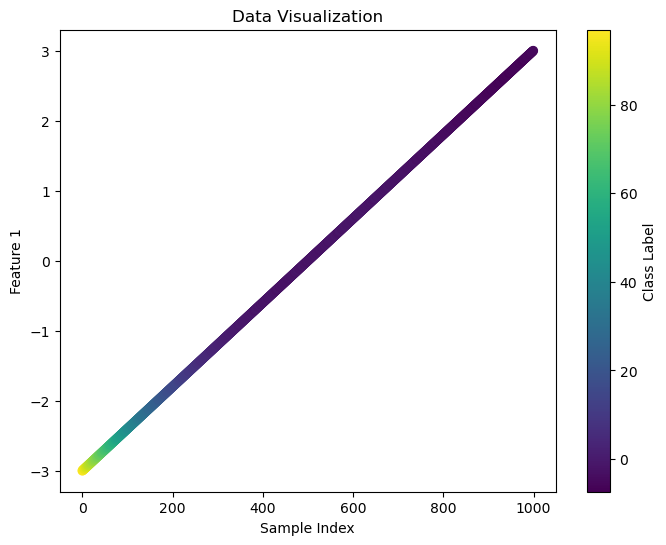

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the data
X = np.load('X.npy')
y = np.load('y.npy')

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(X)), X[:, 0], c=y, cmap='viridis')
plt.xlabel('Sample Index')
plt.ylabel('Feature 1')
plt.title('Data Visualization')
plt.colorbar(label='Class Label')
plt.show()

### b. Regression Models: [0.5+1+0.5 points]

i. Build a [Linear Regression](https://scikit-learn.org/1.5/modules/linear_model.html) model on the provided dataset. Calculate and print the RMSE for this model.

ii. Using the given list of polynomial degrees, build [Polynomial Regression](https://scikit-learn.org/1.5/modules/preprocessing.html#generating-polynomial-features) models on the given dataset for each degree and print the RMSE.

iii. Save the predictions for each model (Linear and different versions of  Polynomial) and create a plot to visualize the predictions against the actual data points.


(i)

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

RMSE: 14.436538518206564


/home/mdra00001/miniforge3/envs/nnti/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(ii) 

In [8]:
degrees = [2, 3, 4] # Polynomial Regression for different degrees

for degree in degrees:
    poly = PolynomialFeatures(degree)
    
    # Fit
    X_train_poly = poly.fit_transform(X_train)
    
    # Transform
    X_test_poly = poly.transform(X_test)
    
    # Initialize and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test_poly)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    print(f"For degree {degree}: RMSE = {rmse}")


For degree 2: RMSE = 8.525415586720989
For degree 3: RMSE = 2.91143962603461
For degree 4: RMSE = 0.48563821460940604


/home/mdra00001/miniforge3/envs/nnti/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/mdra00001/miniforge3/envs/nnti/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/mdra00001/miniforge3/envs/nnti/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(iii)

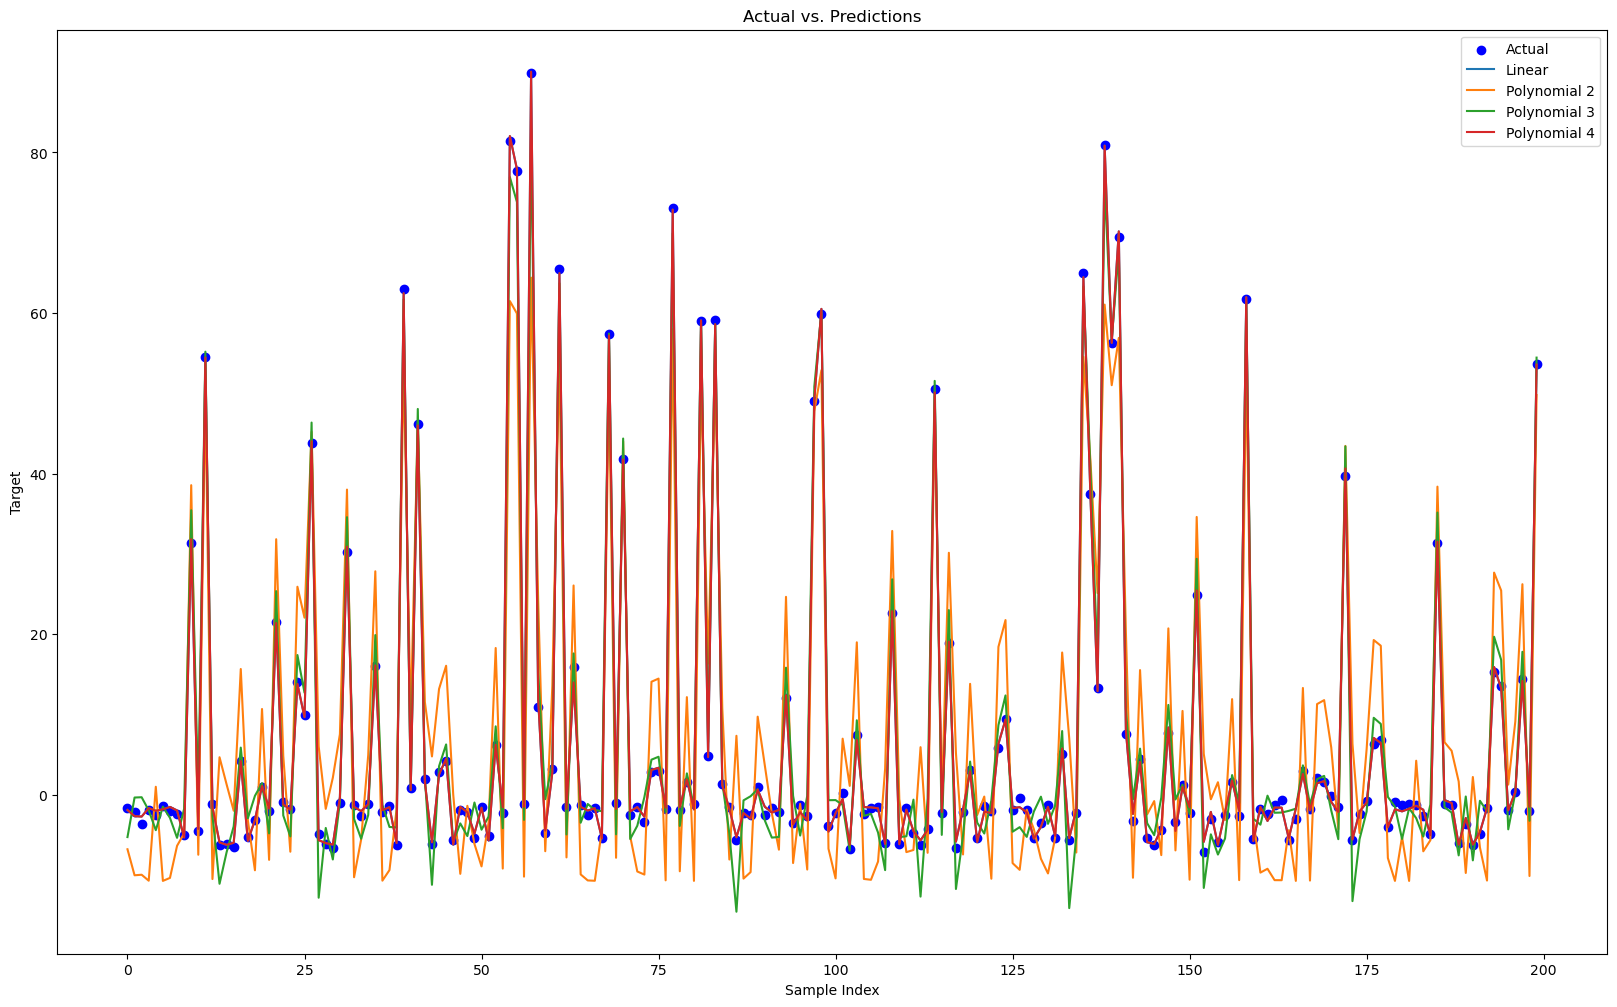

In [13]:
import matplotlib.pyplot as plt

# Dictionary to store predictions
predictions = {}

# Save Linear Regression predictions
predictions['Linear'] = y_pred

# Save Polynomial Regression predictions
for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_pred_poly = model.predict(X_test_poly)
    predictions[f'Polynomial {degree}'] = y_pred_poly

# Plot actual vs predictions
plt.figure(figsize=(20, 12))
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue')

for name, preds in predictions.items():
    plt.plot(range(len(preds)), preds, label=name)

plt.xlabel('Sample Index')
plt.ylabel('Target')
plt.title('Actual vs. Predictions')
plt.legend()
plt.show()